In [2]:
# makes matplotlib plots look like they're part of the notebook?
%matplotlib inline

# import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# import matplotlib
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# import netcdf
import netCDF4
from netCDF4 import Dataset

# import os
import os

In [5]:
# read in netcdf dataset (change to your pathfile)
ERO_read = Dataset(r'C:\Users\meira\OneDrive - University of Florida\UF_Thesis_Research\ERO_NetCDF\day1\grid_stat_ALL_ERO_s2018080212_e2018080312_vhr09_240000L_20180803_120000V_pairs.nc', 'r')

# use to plot all figures (why tho)?
# for filename in os.listdir(r'C:\Users\meira\OneDrive - University of Florida\UF_Thesis_Research\ERO_NetCDF\day1'):
#     ERO_file = Dataset(r'C:\Users\meira\OneDrive - University of Florida\UF_Thesis_Research\ERO_NetCDF\day1\\'+ filename, 'a')
#     plot_EROs(ERO_file)

In [7]:
#use to loop and plot all figures
def plot_EROs(ERO_read):

    #create lat, lon, ERO, OBS variables
    lat_plot = ERO_read.variables['lat'][:]
    lon_plot = ERO_read.variables['lon'][:]
    FCST_plot = ERO_read.variables['FCST_ERO_Surface_FULL'][:, :]
    OBS_plot = ERO_read.variables['OBS_ALL_A365324_FULL_MAX_49'][:, :]

    #draw basemap
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linewidth=2)
    ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='black')
    ax.set_extent([-130, -60, 20, 55])

    # OBS plot
    OBS = ax.contour(lon_plot, lat_plot, OBS_plot, 5, colors = ['white', 'blue', 'black', 'grey', 'maroon'], transform=ccrs.PlateCarree(), label = 'OBS')
    # ERO plot                                                                                 
    ERO = ax.contourf(lon_plot, lat_plot, FCST_plot, 3, colors = ['white', 'green', 'yellow', 'yellow'] , alpha = 0.5, extend = 'neither', transform=ccrs.PlateCarree(), label = 'ERO')

    # legend
    legend_1 = ax.legend(["Marginal Risk", "Slight Risk", "Moderate Risk"])
    cbar = plt.legend([ERO.colors])
    OBS_legend,_ = OBS.legend_elements()
    ERO_legend,_ = ERO.legend_elements()
    OBS_legend_box = ax.legend([OBS_legend[0], OBS_legend[1], OBS_legend[2], OBS_legend[3]], ['No Risk', 'Marginal Risk', 'Slight Risk', 'Moderate Risk'])
    ERO_legend_box = ax.legend([ERO_legend[0], ERO_legend[1], ERO_legend[2], ERO_legend[3]], ['No Risk', 'Marginal Risk', 'Slight Risk', 'Moderate Risk'], loc = 'lower right', title = 'Excessive Rainfall Outlook')

    # title
    title = plt.title("Excessive Rainfall Outlook and Flooding Proxies and Observations, valid 12Z 8/2/2018 - 12Z 8/3/2018")

    # save a fig if you'd like
    # fig.savefig('ERO_20181009.png')

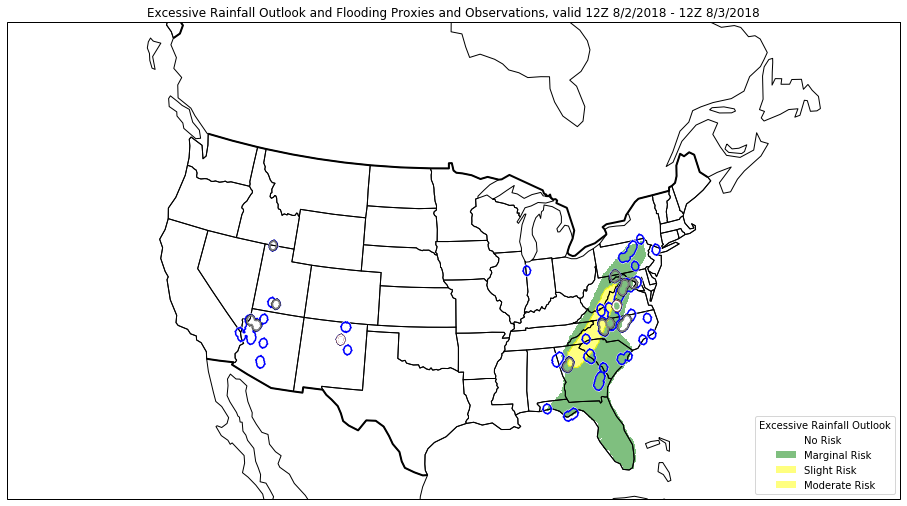

In [8]:
plot_EROs(ERO_read)